In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import RobustScaler, LabelEncoder
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

In [2]:
df = pd.read_csv("./data/data2.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1000 non-null   int64  
 1   avg_bill_methods          1000 non-null   object 
 2   debtor_volume_handled     1000 non-null   int64  
 3   bill_amount_collected     1000 non-null   int64  
 4   total_actual              1000 non-null   int64  
 5   total_cost                1000 non-null   int64  
 6   success_rate              1000 non-null   float64
 7   time_to_collect           1000 non-null   int64  
 8   collector_gender          1000 non-null   object 
 9   collector_marital_status  1000 non-null   object 
 10  collector_age             1000 non-null   int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 86.1+ KB


In [3]:
for i in df.columns:
    if df[i].dtype == "object":
        df[i] = df[i].astype("category")

df.drop(["Unnamed: 0"], axis=1, inplace=True)

In [4]:
df.head()

,avg_bill_methods,debtor_volume_handled,bill_amount_collected,total_actual,total_cost,success_rate,time_to_collect,collector_gender,collector_marital_status,collector_age
0,sms or WA,10,61600000,67200000,72549,92.0,0,laki-laki,Menikah,45
1,sms or WA,15,32800000,140200000,86235,23.0,3,perempuan,Cerai mati,32
2,sms or WA,10,38400000,55300000,99363,69.0,1,laki-laki,Cerai hidup,62
3,sms or WA,9,32500000,57400000,76118,57.0,1,perempuan,Cerai mati,55
4,sms or WA,6,21000000,25400000,61461,83.0,4,perempuan,Menikah,53


In [5]:
bill_methods = LabelEncoder().fit(df["avg_bill_methods"].to_numpy().reshape(-1, 1))
gender = LabelEncoder().fit(df["collector_gender"].to_numpy().reshape(-1, 1))
mart = LabelEncoder().fit(df["collector_marital_status"].to_numpy().reshape(-1, 1))
df2 = pd.DataFrame()

df2["avg_bill_methods"] = bill_methods.transform(df["avg_bill_methods"])
df2["collector_gender"] = gender.transform(df["collector_gender"])
df2["collector_marital_status"] = mart.transform(df["collector_marital_status"])
           
scaler = RobustScaler().fit(df[["bill_amount_collected", "total_actual"]])
df2[["bill_amount_collected", "total_actual"]] = scaler.transform(df[["bill_amount_collected", "total_actual"]])
df2[["time_to_collect", "debtor_volume_handled", "collector_age", "success_rate"]] = df[["time_to_collect", "debtor_volume_handled", "collector_age", "success_rate"]]
y = df["total_cost"]

df2.head(5)

c:\Users\DHONI HANIF\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\DHONI HANIF\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\DHONI HANIF\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,avg_bill_methods,collector_gender,collector_marital_status,bill_amount_collected,total_actual,time_to_collect,debtor_volume_handled,collector_age,success_rate
0,2,0,3,-0.192152,-0.347049,0,10,45,92.0
1,2,1,2,-0.329132,-0.181787,3,15,32,23.0
2,2,0,1,-0.302497,-0.373988,1,10,62,69.0
3,2,1,2,-0.330559,-0.369234,1,9,55,57.0
4,2,1,3,-0.385256,-0.441678,4,6,53,83.0


In [6]:
X = df2

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)
model = GradientBoostingRegressor()
model.fit(X_train, y_train)

GradientBoostingRegressor()

In [7]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
rmse = mse ** (1/2)
r_square = r2_score(y_test, y_pred)

print(f"""
      Mean Squared Error : {mse:.2f}
      Mean Absolute Error : {mae:.2f}
      Mean Absolute Percentage Error : {mape:.2f}
      Root Mean Squared Error : {rmse:.2f}
      R_Squared : {r_square:.2f}
      """)


      Mean Squared Error : 41986944741.78
      Mean Absolute Error : 134029.21
      Mean Absolute Percentage Error : 0.22
      Root Mean Squared Error : 204907.16
      R_Squared : 0.95
      


In [8]:
import pickle

pickle.dump(model, open("gradient.pkl", "wb"))

In [9]:
search_grid={'n_estimators':[500,1000,2000],'learning_rate':[.001,0.01,.1],'max_depth':[1,2,4],'subsample':[.5,.75,1],'random_state':[1]}
grid_search=GridSearchCV(estimator=model,param_grid=search_grid,scoring='neg_mean_squared_error',n_jobs=1,cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1],
                         'max_depth': [1, 2, 4],
                         'n_estimators': [500, 1000, 2000], 'random_state': [1],
                         'subsample': [0.5, 0.75, 1]},
             scoring='neg_mean_squared_error')

In [10]:
grid_search.best_score_

-37293836669.853355

In [11]:
model = grid_search.best_estimator_
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
rmse = mse ** (1/2)
r_square = r2_score(y_test, y_pred)

print(f"""
      Mean Squared Errror : {mse:.2f}
      Mean Absolute Error : {mae:.2f}
      Mean Absolute Percentage Error : {mape:.2f}
      Root Mean Squared Error : {mape:.2f}
      R_Squared : {r_square:.2f}
      """)


      Mean Squared Errror : 39489068318.51
      Mean Absolute Error : 135379.10
      Mean Absolute Percentage Error : 0.35
      Root Mean Squared Error : 0.35
      R_Squared : 0.95
      


In [12]:
pickle.dump(model, open("gradient2.pkl", "wb"))

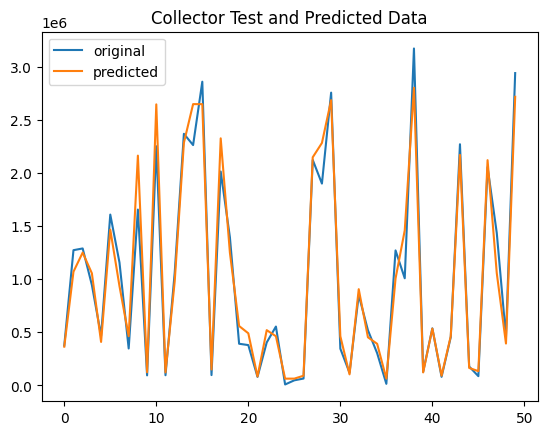

In [13]:
x_ax = range(len(y_test[:50]))
plt.plot(x_ax, y_test[:50], label="original")
plt.plot(x_ax, y_pred[:50], label="predicted")
plt.title("Collector Test and Predicted Data")
plt.legend()
plt.show()